In [483]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [484]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [485]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [486]:
data.shape

(891, 12)

In [487]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [488]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [489]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [490]:
data = data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [491]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [492]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [493]:
data['Embarked']=data['Embarked'].fillna('Q')

In [494]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [495]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [496]:
data['Age']=data['Age'].fillna(data.Age.mean())

In [497]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


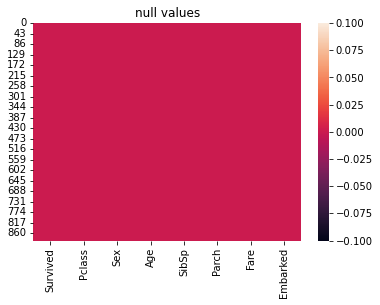

In [498]:
sns.heatmap(data.isnull())
plt.title('null values')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

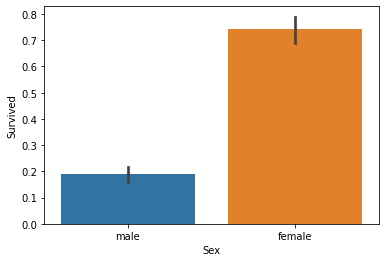

In [499]:
sns.barplot(x='Sex',y='Survived',data=data)


In [500]:
from sklearn.preprocessing import LabelEncoder

In [501]:
l1=LabelEncoder()

In [502]:
data['Sex']=l1.fit_transform(data['Sex'])
data['Embarked']=l1.fit_transform(data['Embarked'])

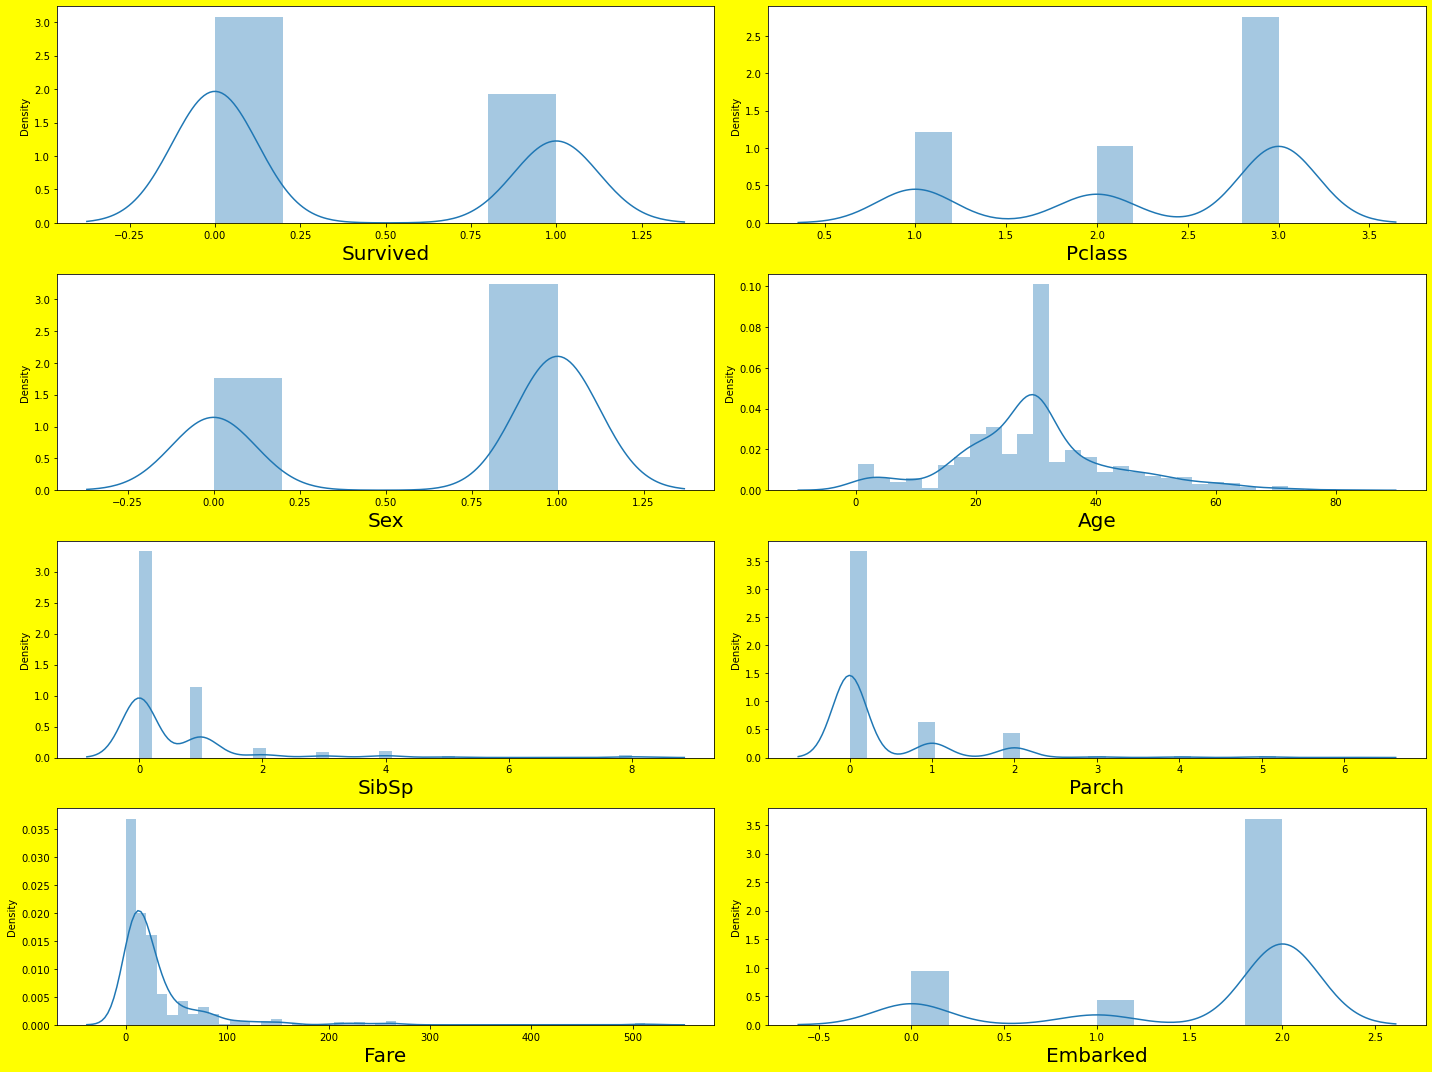

In [503]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [504]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [505]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [506]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [507]:
X.skew().sort_values(ascending = False)

Fare        4.787317
SibSp       3.695352
Parch       2.749117
Age         0.434488
Sex        -0.618921
Pclass     -0.630548
Embarked   -1.256969
dtype: float64

In [508]:
from sklearn.preprocessing import power_transform
X_new = power_transform(X)

In [509]:
pd.DataFrame(X_new, columns = X.columns).skew().sort_values(ascending = False)

Parch       1.228795
SibSp       0.808608
Age         0.064420
Fare       -0.040329
Pclass     -0.441438
Sex        -0.618921
Embarked   -1.053792
dtype: float64

In [510]:
X = pd.DataFrame(X_new, columns = X.columns)

In [511]:
X.shape

(891, 7)

In [512]:
X.skew()[np.abs(X.skew())<0.20].all()

True

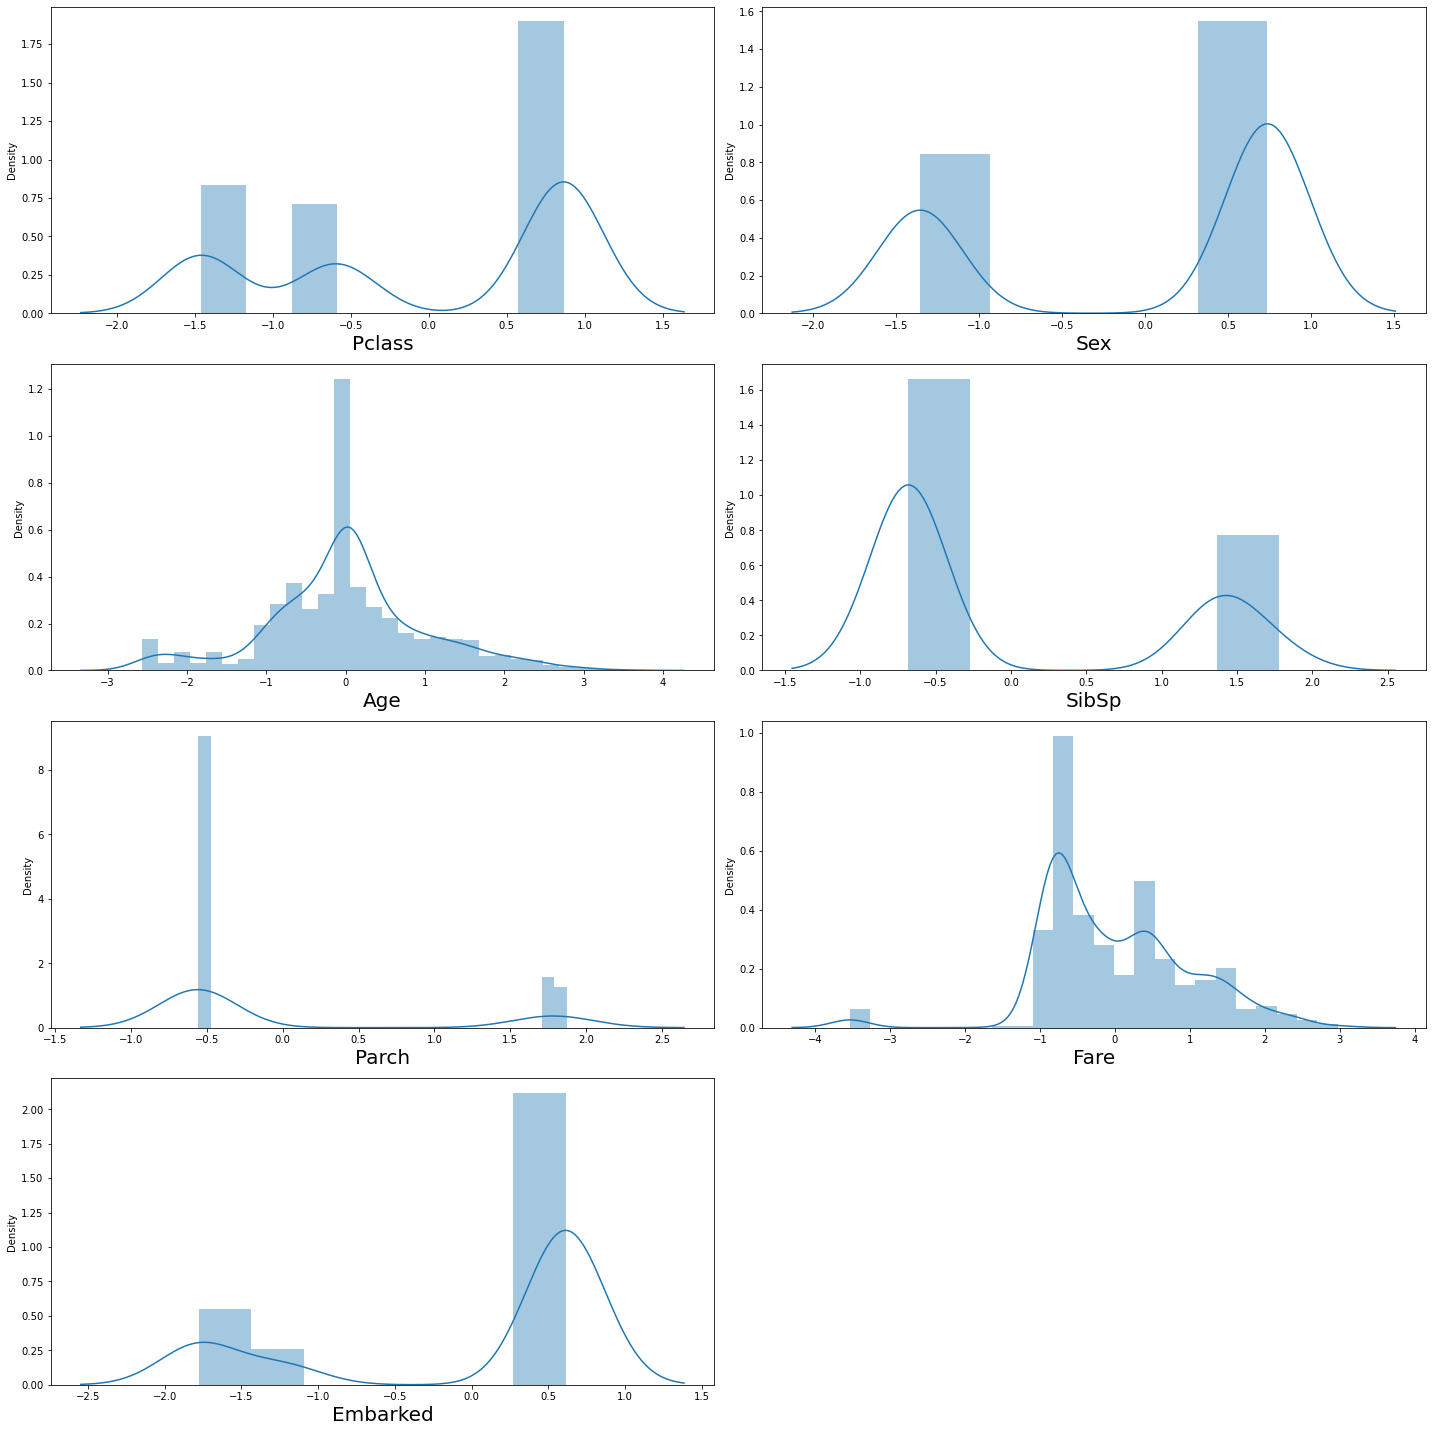

In [513]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

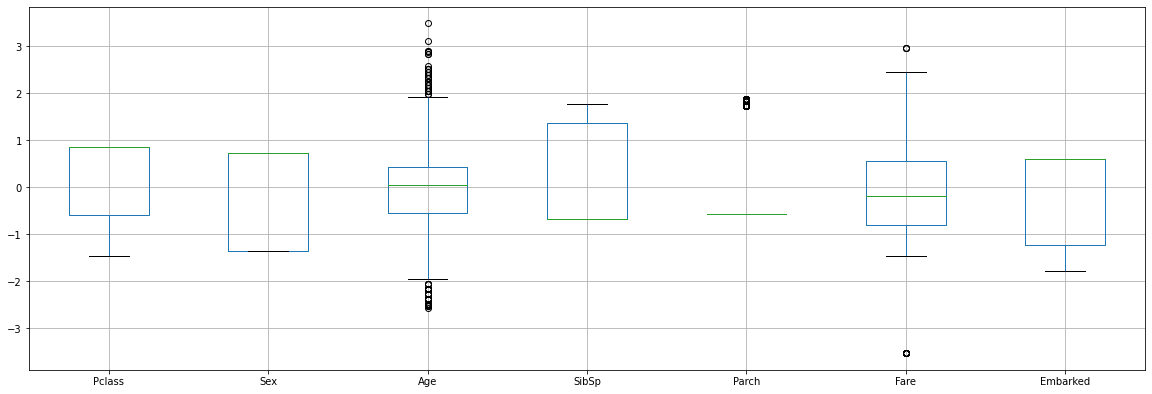

In [514]:
X.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [515]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

Pclass       True
Sex          True
Age         False
SibSp        True
Parch        True
Fare        False
Embarked     True
dtype: bool

In [516]:
(np.abs(zscore(X))>-3).all()

Pclass      True
Sex         True
Age         True
SibSp       True
Parch       True
Fare        True
Embarked    True
dtype: bool

In [517]:
# Validating OUtliers

#1st Quantile
q1 = X.quantile(0.25)

#3rd quantile
q3 = X.quantile(0.75)

#IQR
iqr = q3 - q1
iqr

Pclass      1.456577
Sex         2.093269
Age         0.994190
SibSp       2.053486
Parch       0.000000
Fare        1.351366
Embarked    1.840285
dtype: float64

In [518]:
Age_high = q3.Age + (1.5 * iqr.Age)
index1 = np.where(X['Age']> Age_high)
X = X.drop(X['Age'].index[index1])
y = y.drop(y.index[index1])
print(X.shape)
print(y.shape)

(856, 7)
(856,)


In [519]:
Fare_high = q3.Fare + (1.5 * iqr.Fare)
index1 = np.where(X['Age']> Fare_high )
X = X.drop(X['Fare'].index[index1])
y = y.drop(y.index[index1])
print(X.shape)
print(y.shape)

(856, 7)
(856,)


In [520]:
Age_low = q1.Age -(1.5 * iqr.Age)
index2 = np.where(X['Age']< Age_low )
X = X.drop(X['Age'].index[index2])
y = y.drop(y.index[index2])
print(X.shape)
print(y.shape)

(812, 7)
(812,)


In [521]:
Fare_low = q1.Fare - (1.5 * iqr.Fare)
index2 = np.where(X['Age']< Fare_low )
X = X.drop(X['Fare'].index[index2])
y = y.drop(y.index[index2])
print(X.shape)
print(y.shape)

(812, 7)
(812,)


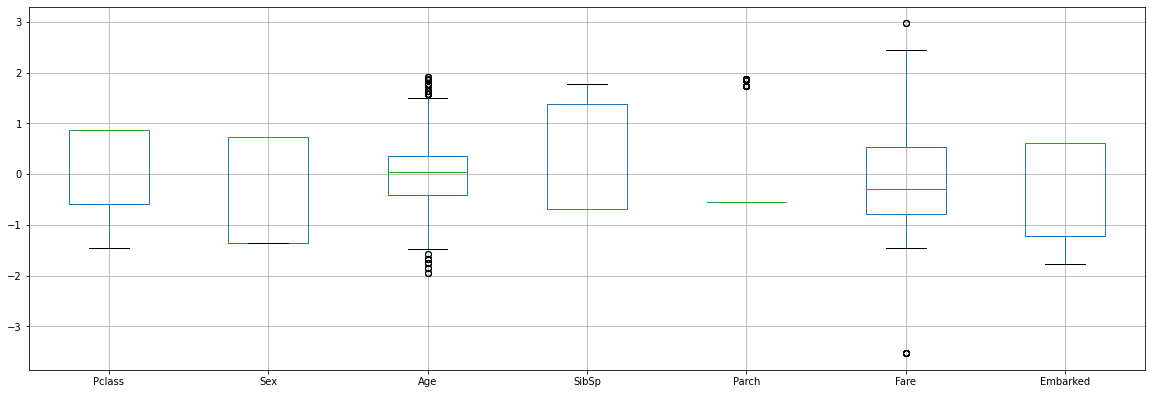

In [522]:
X.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [523]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

In [524]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = X.columns

In [525]:
X.shape

(812, 7)

In [526]:
y.shape

(812,)

In [534]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('accuracy score', acc, 'random_state', i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.7783251231527094 random_state 1
accuracy score 0.7783251231527094 random_state 1
accuracy score 0.8078817733990148 random_state 2
accuracy score 0.8078817733990148 random_state 2
accuracy score 0.7881773399014779 random_state 3
accuracy score 0.8078817733990148 random_state 4
accuracy score 0.812807881773399 random_state 5
accuracy score 0.812807881773399 random_state 5
accuracy score 0.7684729064039408 random_state 6
accuracy score 0.7733990147783252 random_state 7
accuracy score 0.8522167487684729 random_state 8
accuracy score 0.8522167487684729 random_state 8
accuracy score 0.8078817733990148 random_state 9
accuracy score 0.8719211822660099 random_state 10
accuracy score 0.8719211822660099 random_state 10
accuracy score 0.8078817733990148 random_state 11
accuracy score 0.7931034482758621 random_state 12
accuracy score 0.7684729064039408 random_state 13
accuracy score 0.8226600985221675 random_state 14
accuracy score 0.8029556650246306 random_state 15
accuracy score 

accuracy score 0.8325123152709359 random_state 164
accuracy score 0.8029556650246306 random_state 165
accuracy score 0.7586206896551724 random_state 166
accuracy score 0.8029556650246306 random_state 167
accuracy score 0.8374384236453202 random_state 168
accuracy score 0.8226600985221675 random_state 169
accuracy score 0.812807881773399 random_state 170
accuracy score 0.7881773399014779 random_state 171
accuracy score 0.8029556650246306 random_state 172
accuracy score 0.7733990147783252 random_state 173
accuracy score 0.7832512315270936 random_state 174
accuracy score 0.7487684729064039 random_state 175
accuracy score 0.8078817733990148 random_state 176
accuracy score 0.8078817733990148 random_state 177
accuracy score 0.8275862068965517 random_state 178
accuracy score 0.8177339901477833 random_state 179
accuracy score 0.7980295566502463 random_state 180
accuracy score 0.8029556650246306 random_state 181
accuracy score 0.812807881773399 random_state 182
accuracy score 0.7881773399014779

accuracy score 0.8275862068965517 random_state 328
accuracy score 0.7881773399014779 random_state 329
accuracy score 0.7586206896551724 random_state 330
accuracy score 0.7783251231527094 random_state 331
accuracy score 0.7980295566502463 random_state 332
accuracy score 0.7980295566502463 random_state 333
accuracy score 0.7931034482758621 random_state 334
accuracy score 0.812807881773399 random_state 335
accuracy score 0.8078817733990148 random_state 336
accuracy score 0.8177339901477833 random_state 337
accuracy score 0.8177339901477833 random_state 338
accuracy score 0.8620689655172413 random_state 339
accuracy score 0.7783251231527094 random_state 340
accuracy score 0.8325123152709359 random_state 341
accuracy score 0.7881773399014779 random_state 342
accuracy score 0.7832512315270936 random_state 343
accuracy score 0.8177339901477833 random_state 344
accuracy score 0.812807881773399 random_state 345
accuracy score 0.8374384236453202 random_state 346
accuracy score 0.7832512315270936

accuracy score 0.7684729064039408 random_state 497
accuracy score 0.7881773399014779 random_state 498
accuracy score 0.7931034482758621 random_state 499
accuracy score 0.812807881773399 random_state 500
accuracy score 0.8472906403940886 random_state 501
accuracy score 0.8275862068965517 random_state 502
accuracy score 0.8719211822660099 random_state 503
accuracy score 0.7881773399014779 random_state 504
accuracy score 0.7980295566502463 random_state 505
accuracy score 0.8078817733990148 random_state 506
accuracy score 0.7733990147783252 random_state 507
accuracy score 0.8029556650246306 random_state 508
accuracy score 0.812807881773399 random_state 509
accuracy score 0.7586206896551724 random_state 510
accuracy score 0.8029556650246306 random_state 511
accuracy score 0.8078817733990148 random_state 512
accuracy score 0.8325123152709359 random_state 513
accuracy score 0.7980295566502463 random_state 514
accuracy score 0.8226600985221675 random_state 515
accuracy score 0.8177339901477833

accuracy score 0.7733990147783252 random_state 662
accuracy score 0.7339901477832512 random_state 663
accuracy score 0.8226600985221675 random_state 664
accuracy score 0.7684729064039408 random_state 665
accuracy score 0.7931034482758621 random_state 666
accuracy score 0.8078817733990148 random_state 667
accuracy score 0.8325123152709359 random_state 668
accuracy score 0.7881773399014779 random_state 669
accuracy score 0.7783251231527094 random_state 670
accuracy score 0.812807881773399 random_state 671
accuracy score 0.812807881773399 random_state 672
accuracy score 0.8177339901477833 random_state 673
accuracy score 0.7832512315270936 random_state 674
accuracy score 0.8029556650246306 random_state 675
accuracy score 0.8374384236453202 random_state 676
accuracy score 0.8177339901477833 random_state 677
accuracy score 0.8325123152709359 random_state 678
accuracy score 0.7980295566502463 random_state 679
accuracy score 0.8275862068965517 random_state 680
accuracy score 0.7881773399014779

accuracy score 0.7635467980295566 random_state 832
accuracy score 0.7783251231527094 random_state 833
accuracy score 0.8078817733990148 random_state 834
accuracy score 0.7635467980295566 random_state 835
accuracy score 0.7783251231527094 random_state 836
accuracy score 0.7931034482758621 random_state 837
accuracy score 0.8226600985221675 random_state 838
accuracy score 0.8374384236453202 random_state 839
accuracy score 0.8078817733990148 random_state 840
accuracy score 0.8177339901477833 random_state 841
accuracy score 0.8325123152709359 random_state 842
accuracy score 0.8078817733990148 random_state 843
accuracy score 0.8177339901477833 random_state 844
accuracy score 0.8078817733990148 random_state 845
accuracy score 0.7980295566502463 random_state 846
accuracy score 0.8325123152709359 random_state 847
accuracy score 0.8325123152709359 random_state 848
accuracy score 0.8177339901477833 random_state 849
accuracy score 0.7980295566502463 random_state 850
accuracy score 0.75369458128078

accuracy score 0.7980295566502463 random_state 997
accuracy score 0.7980295566502463 random_state 998
accuracy score 0.7980295566502463 random_state 999


In [535]:
 print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.8768472906403941 random_state 999


In [529]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 999)

In [536]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve


In [537]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7980295566502463
[[101  14]
 [ 27  61]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       115
           1       0.81      0.69      0.75        88

    accuracy                           0.80       203
   macro avg       0.80      0.79      0.79       203
weighted avg       0.80      0.80      0.80       203



In [538]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7931034482758621
[[105  10]
 [ 32  56]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       115
           1       0.85      0.64      0.73        88

    accuracy                           0.79       203
   macro avg       0.81      0.77      0.78       203
weighted avg       0.80      0.79      0.79       203



In [539]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7586206896551724
[[93 22]
 [27 61]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       115
           1       0.73      0.69      0.71        88

    accuracy                           0.76       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.76      0.76      0.76       203



In [540]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7931034482758621
[[102  13]
 [ 29  59]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       115
           1       0.82      0.67      0.74        88

    accuracy                           0.79       203
   macro avg       0.80      0.78      0.78       203
weighted avg       0.80      0.79      0.79       203



In [467]:
from sklearn.model_selection import cross_val_score

acc = accuracy_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(reg, X, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc)

At CV: 2
Cross Validation Score is:  79.55665024630542
Accuracy Score is :  0.7881773399014779
At CV: 3
Cross Validation Score is:  80.29702519247414
Accuracy Score is :  0.7881773399014779
At CV: 4
Cross Validation Score is:  80.54187192118226
Accuracy Score is :  0.7881773399014779
At CV: 5
Cross Validation Score is:  80.17344542906916
Accuracy Score is :  0.7881773399014779
At CV: 6
Cross Validation Score is:  79.68409586056644
Accuracy Score is :  0.7881773399014779
At CV: 7
Cross Validation Score is:  79.80295566502463
Accuracy Score is :  0.7881773399014779
At CV: 8
Cross Validation Score is:  80.04999029314696
Accuracy Score is :  0.7881773399014779
At CV: 9
Cross Validation Score is:  80.42463709130377
Accuracy Score is :  0.7881773399014779


In [541]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
grd = GridSearchCV(reg, param_grid = param_grid)
grd.fit(x_train, y_train)
print('Best Param ==>', grd.best_params_)
clf = grd.best_estimator_ 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

reg_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', reg_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

conf_mat ==> 
 [[101  14]
 [ 27  61]]

Accuracy rf Normal ==> 
 0.7980295566502463


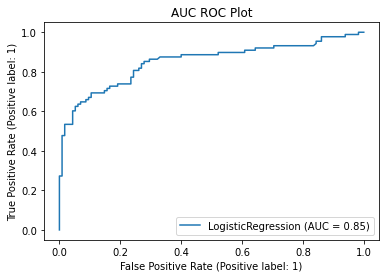

In [470]:
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()